In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pathlib
dataset_url = "/content/drive/My Drive/Colab Notebooks/train"
data_dir = pathlib.Path(dataset_url)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4955


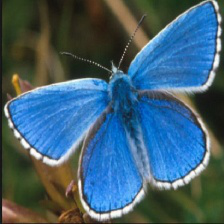

In [ ]:
adonis = list(data_dir.glob('adonis/*'))
PIL.Image.open(str(adonis[40]))

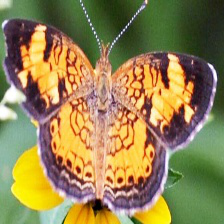

In [ ]:
crecent = list(data_dir.glob('crecent/*'))
PIL.Image.open(str(crecent[1]))

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4955 files belonging to 50 classes.
Using 3964 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4955 files belonging to 50 classes.
Using 991 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['adonis', 'american snoot', 'an 88', 'banded peacock', 'beckers white', 'black hairstreak', 'cabbage white', 'chestnut', 'clodius parnassian', 'clouded sulphur', 'copper tail', 'crecent', 'crimson patch', 'eastern coma', 'gold banded', 'great eggfly', 'grey hairstreak', 'indra swallow', 'julia', 'large marble', 'malachite', 'mangrove skipper', 'metalmark', 'monarch', 'morning cloak', 'orange oakleaf', 'orange tip', 'orchard swallow', 'painted lady', 'paper kite', 'peacock', 'pine white', 'pipevine swallow', 'purple hairstreak', 'question mark', 'red admiral', 'red spotted purple', 'scarce swallow', 'silver spot skipper', 'sixspot burnet', 'skipper', 'sootywing', 'southern dogface', 'straited queen', 'two barred flasher', 'ulyses', 'viceroy', 'wood satyr', 'yellow swallow tail', 'zebra long wing']


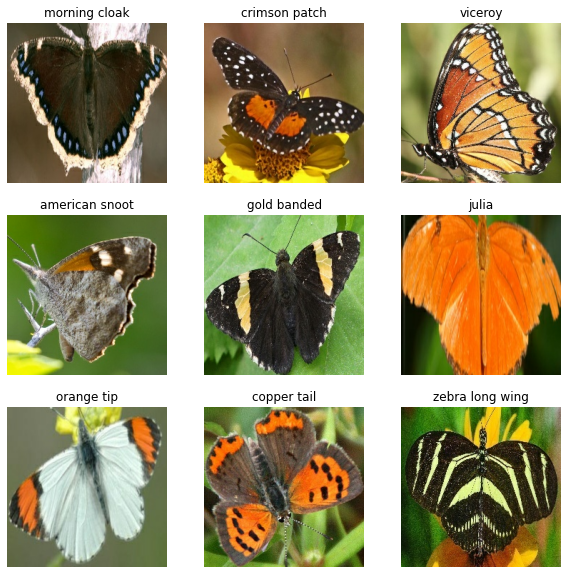

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
124/124 [==============================] - 294s 2s/step - loss: 3.4154 - accuracy: 0.1385 - val_loss: 2.7003 - val_accuracy: 0.2916
Epoch 2/10
124/124 [==============================] - 196s 2s/step - loss: 1.8930 - accuracy: 0.4854 - val_loss: 1.8035 - val_accuracy: 0.5086
Epoch 3/10
124/124 [==============================] - 196s 2s/step - loss: 0.9706 - accuracy: 0.7205 - val_loss: 1.6650 - val_accuracy: 0.5419
Epoch 4/10
124/124 [==============================] - 194s 2s/step - loss: 0.3760 - accuracy: 0.8956 - val_loss: 1.9717 - val_accuracy: 0.5348
Epoch 5/10
124/124 [==============================] - 195s 2s/step - loss: 0.1663 - accuracy: 0.9548 - val_loss: 2.2304 - val_accuracy: 0.5459
Epoch 6/10
124/124 [==============================] - 195s 2s/step - loss: 0.1040 - accuracy: 0.9728 - val_loss: 2.4602 - val_accuracy: 0.5378
Epoch 7/10
124/124 [==============================] - 195s 2s/step - loss: 0.0701 - accuracy: 0.9828 - val_loss: 2.8776 - val_accuracy: 0.5469

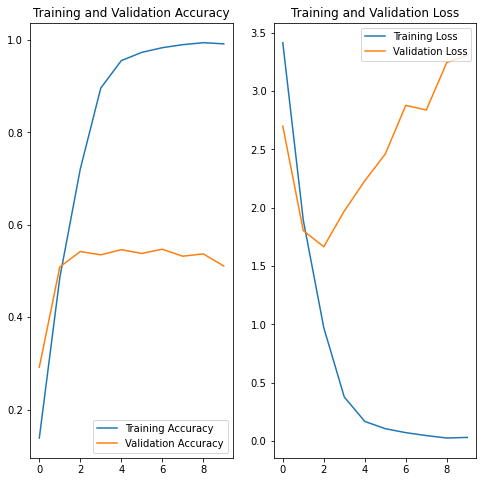

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

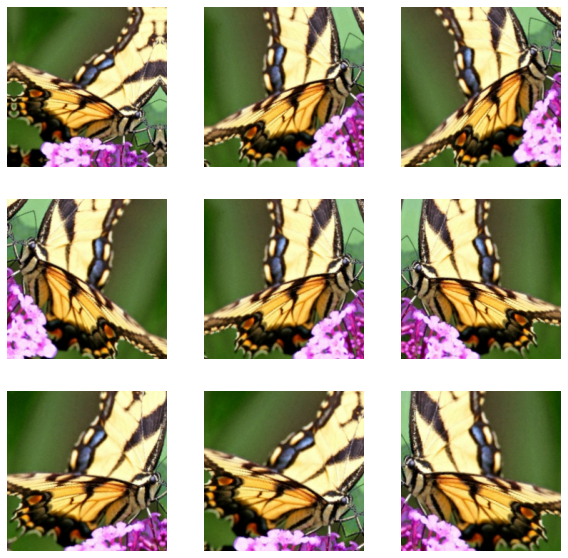

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
124/124 [==============================] - 226s 2s/step - loss: 3.6007 - accuracy: 0.0933 - val_loss: 3.1890 - val_accuracy: 0.1746
Epoch 2/15
124/124 [==============================] - 224s 2s/step - loss: 2.4241 - accuracy: 0.3373 - val_loss: 2.0938 - val_accuracy: 0.4289
Epoch 3/15
124/124 [==============================] - 224s 2s/step - loss: 1.8610 - accuracy: 0.4839 - val_loss: 1.7740 - val_accuracy: 0.4914
Epoch 4/15
124/124 [==============================] - 224s 2s/step - loss: 1.5554 - accuracy: 0.5623 - val_loss: 1.6720 - val_accuracy: 0.5267
Epoch 5/15
124/124 [==============================] - 224s 2s/step - loss: 1.3722 - accuracy: 0.6009 - val_loss: 1.4591 - val_accuracy: 0.5923
Epoch 6/15
124/124 [==============================] - 222s 2s/step - loss: 1.2189 - accuracy: 0.6498 - val_loss: 1.4140 - val_accuracy: 0.5984
Epoch 7/15
124/124 [==============================] - 222s 2s/step - loss: 1.0974 - accuracy: 0.6766 - val_loss: 1.4707 - val_accuracy: 0.5943

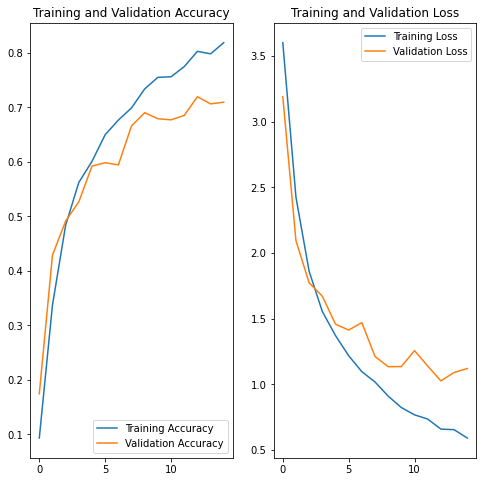

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [ ]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets
